***IMPORT*** ***NECCESSARY*** ***LIBRARIES***

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***LOAD*** ***THE*** ***DATASET***

In [102]:
from google.colab import files
files.upload()

Saving retail_sales_dataset.csv to retail_sales_dataset (4).csv


{'retail_sales_dataset (4).csv': b'Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount\r\n1,2023-11-24,CUST001,Male,34,Beauty,3,50,150\r\n2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000\r\n3,2023-01-13,CUST003,Male,50,Electronics,1,30,30\r\n4,2023-05-21,CUST004,Male,37,Clothing,1,500,500\r\n5,2023-05-06,CUST005,Male,30,Beauty,2,50,100\r\n6,2023-04-25,CUST006,Female,45,Beauty,1,30,30\r\n7,2023-03-13,CUST007,Male,46,Clothing,2,25,50\r\n8,2023-02-22,CUST008,Male,30,Electronics,4,25,100\r\n9,2023-12-13,CUST009,Male,63,Electronics,2,300,600\r\n10,2023-10-07,CUST010,Female,52,Clothing,4,50,200\r\n11,2023-02-14,CUST011,Male,23,Clothing,2,50,100\r\n12,2023-10-30,CUST012,Male,35,Beauty,3,25,75\r\n13,2023-08-05,CUST013,Male,22,Electronics,3,500,1500\r\n14,2023-01-17,CUST014,Male,64,Clothing,4,30,120\r\n15,2023-01-16,CUST015,Female,42,Electronics,4,500,2000\r\n16,2023-02-17,CUST016,Male,19,Clothing,3,500,1500\r\n17,2023-04-22,CUST017,Female,27,Cloth

In [103]:
df =  pd.read_csv('retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


***DATA*** ***CLEANING***

In [104]:
df.shape

(1000, 9)

In [105]:
df.isnull().sum().sum()

0

In [106]:
df.duplicated().sum()

0

***DESCRIPTIVE*** ***STATISTICS***

In [107]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


Time Series Analysis:

In [108]:
df['Date'] = pd.to_datetime(df['Date'])

In [109]:
df.set_index('Date', inplace=True)
monthly_sales = df['Total Amount'].resample('M').sum()
monthly_sales.head()

,Total Amount
Date,
2023-01-31,35450
2023-02-28,44060
2023-03-31,28990
2023-04-30,33870
2023-05-31,53150


Customer Demographics Analysis:



In [110]:
gender_dist = df['Gender'].value_counts()
age_dist = df['Age'].describe()

print('Gender distribution:', gender_dist)
print('Age Distribution:', age_dist)

Gender distribution: Gender
Female    510
Male      490
Name: count, dtype: int64
Age Distribution: count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: Age, dtype: float64


Product Analysis:



In [111]:
product_dist = df['Product Category'].value_counts()
print('Product Category Distribution:', product_dist)

Product Category Distribution: Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


Transaction Summary:




In [112]:
total_transactions = df['Transaction ID'].nunique()
total_revenue = df['Total Amount'].sum()

print('Total Number of Transcation Is:', total_transactions)
print('Total Revenue is:', total_revenue)

Total Number of Transcation Is: 1000
Total Revenue is: 456000


Customer Purchasing Behavior:

In [113]:
customer_total_purchase = df.groupby('Customer ID')['Total Amount'].sum()
avg_purchase_per_transaction = df['Transaction ID'].mean()
top_products = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending = False)

print('Total  Purchase By Customer is:', customer_total_purchase)
print('Average Purchase Per Transaction Is:', avg_purchase_per_transaction)
print('Top products By Revenue Are:', top_products )


Total  Purchase By Customer is: Customer ID
CUST001     150
CUST002    1000
CUST003      30
CUST004     500
CUST005     100
           ... 
CUST995      30
CUST996      50
CUST997      90
CUST998     100
CUST999     150
Name: Total Amount, Length: 1000, dtype: int64
Average Purchase Per Transaction Is: 500.5
Top products By Revenue Are: Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


***VISUALIZATION***

Sales Trend Over Time Graph:

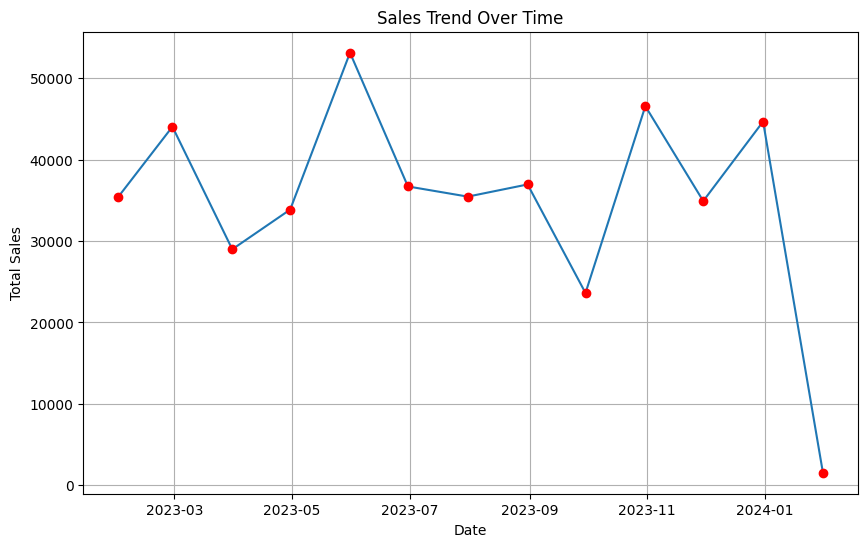

In [114]:
plt.figure(figsize=(10,6))
plt.plot(monthly_sales,'o-', mec = 'r', mfc = 'r')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Time')
plt.grid()
plt.show()

Age Distribution Graph:

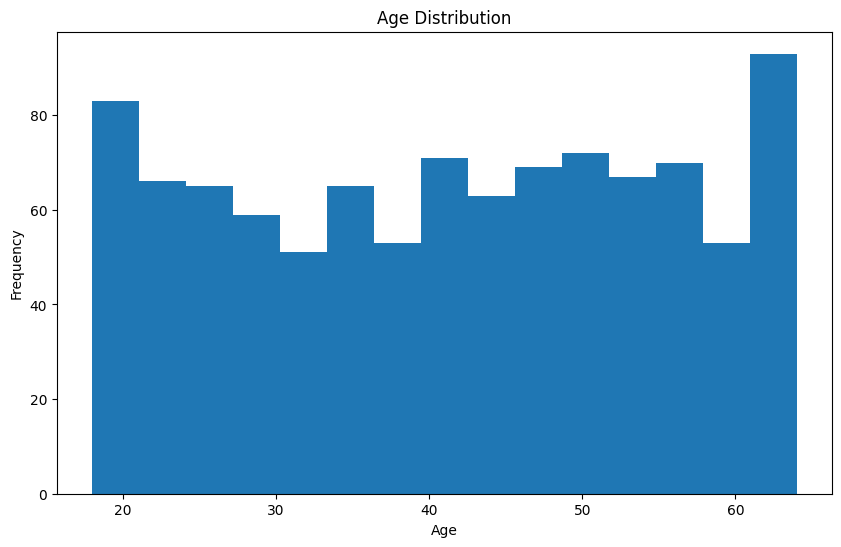

In [115]:

plt.figure(figsize=(10,6))
df['Age'].hist(bins=15)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

Gender Distribution Graph:

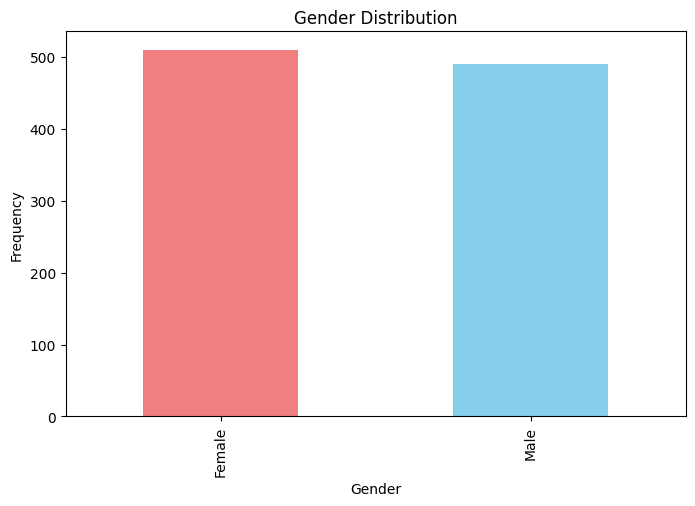

In [116]:
plt.figure(figsize=(8,5))
gender_dist.plot(kind='bar', color=['lightcoral','skyblue'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

In [117]:
gender_proportion = df['Gender'].value_counts(normalize=True) * 100
print(gender_proportion)


Gender
Female    51.0
Male      49.0
Name: proportion, dtype: float64


Products Revenue Graph

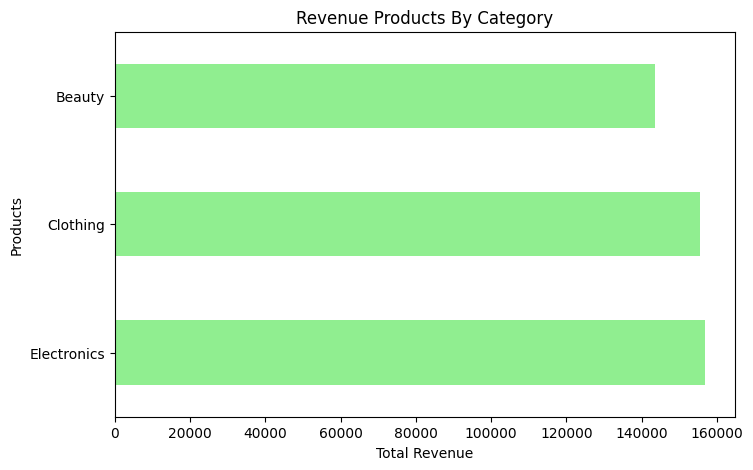

In [118]:
plt.figure(figsize=(8,5))
top_products.plot(kind = 'barh', color = 'lightgreen')
plt.xlabel('Total Revenue')
plt.ylabel('Products')
plt.title('Revenue Products By Category')
plt.show()

Customer Purchase Amount Distribution Graph:

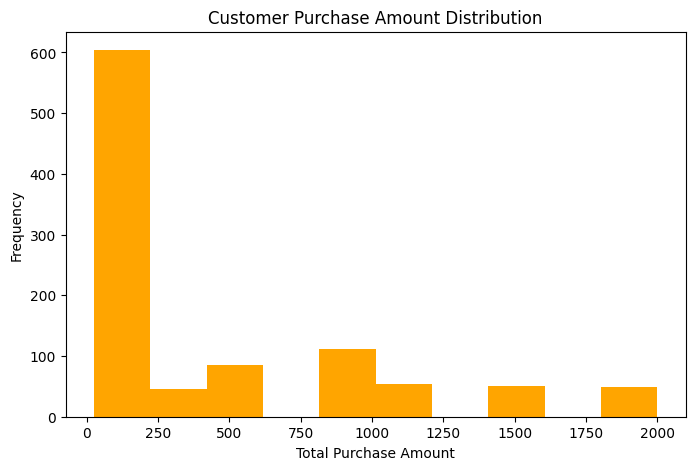

In [119]:
plt.figure(figsize=(8,5))
customer_total_purchase.plot(kind='hist', color = ['orange'])
plt.title('Customer Purchase Amount Distribution')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Frequency')
plt.show()

***RECOMMENDATIONS***

**SALES** **TREND** **INSIGHTS**

*   Findings from the Sales Trend Analysis:

Peak Sales Months: March, June, and November are the months with the highest sales, suggesting seasonality or successful marketing campaigns during these periods.

Low Sales Months: Significant drops in sales are observed in April, September, and January, indicating periods where demand is lower.

Sales don't appear to maintain a steady growth trajectory, indicating possible issues with consistent customer retention or the impact of external factors.


*   Recommendations for Improving Sales:

Customer Engagement: Increase customer engagement through newsletters, targeted offers, and new year promotions to maintain interest and spending.

Loyalty Programs: Introduce loyalty programs to encourage repeat purchases and build a loyal customer base, particularly targeting months with lower sales.

Seasonal Products: Offer seasonal products or limited-time offers that resonate with the specific periods of high demand.

Customer Feedback: Collect feedback from customers to understand the reasons for fluctuations, especially during low sales periods, and adjust offerings accordingly.




**DEMOGRAPHIC** **INSIGHTS**

*   Findings from Age Distribution Analysis:

Young Adults (18-29): Represents customers in the lower quartile.
Middle-Aged Adults (30-53): Largest age group, indicating that most customers are in this range.
Older Adults (54-64): In the upper quartile, indicating a smaller but significant segment of older customers.


*  Recommendations from Age Distribution Analysis:

Middle-Aged Focus: Since the majority of customers are middle-aged (30-53 years), tailor marketing campaigns and product offerings to appeal to their preferences and lifestyle needs. For instance, focus on products that cater to family needs, home improvement, or career advancement.
Youth Engagement: Create campaigns targeting younger customers (18-29 years) to capture long-term loyalty. Utilize social media platforms like Instagram, Snapchat, and TikTok, which are popular among this demographic.
Older Demographic: Implement campaigns that resonate with the older demographic (54-64 years), potentially focusing on health and wellness, travel, and leisure products.

Promotional Offers: Design special promotions and discounts for key age segments to boost engagement and sales during off-peak times.

User-Friendly Interfaces: Ensure that your website and app interfaces are user-friendly and accessible to all age groups, particularly the older demographic, who might face usability challenges.



*   Findings from Gender Distribution Analysis:

Equal Representation:

The gender distribution is fairly balanced, with 51% female and 49% male customers.

Gender Parity:

The small difference in percentage indicates gender parity, meaning both male and female customers are almost equally engaged with your brand.

*   Recommendations From Gender Distribution Analysis:

Since the gender distribution is nearly equal, create marketing campaigns that are gender-neutral and inclusive, ensuring that your messaging resonates with both male and female audiences.

Consider implementing gender-specific promotions where applicable, but ensure these are balanced and respectful, avoiding stereotypes. For example, if certain products appeal more to one gender, tailor specific offers around those items while maintaining inclusivity.

Use gender analytics to inform sales strategies, identifying which products perform well among different genders and adjusting sales approaches accordingly.




**PURCHASING BEHAVIOUR INSIGHTS**

*   Findings from Product Category Distribution Analysis:

Revenue Breakdown:

Clothing is the highest revenue-generating category, closely followed by Electronics and Beauty.
Each category contributes significantly to the overall revenue, with a relatively balanced revenue distribution across categories.

Transaction Volume:

Clothing: 351 transactions
Electronics: 342 transactions
Beauty: 307 transactions.
The total number of transactions is 1,000, indicating active customer engagement across all product categories.

The total revenue generated is $456,000, indicating healthy sales performance across the business.

*   Recommendations From Product Category Distribution Analysis:

Given that clothing is the top-performing category, ensure that inventory for popular clothing items is well-stocked to meet demand.

Develop targeted marketing campaigns for each category. For clothing, emphasize seasonal collections, while for electronics, focus on new product releases and technology advancements.

Use limited-time sales promotions to boost transactions, particularly for beauty products, which may benefit from impulse purchases

Continuously analyze sales data to adapt strategies, ensuring alignment with customer demand and market conditions.

